# Group 6 - Week 4 Activity

# Importing necessary libraries

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load excel File

In [72]:
df=pd.read_excel('Telco-Customer-Churn.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [44]:
#understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 1. Compare Churn count and Gender

In [45]:
# creating pivot table of gender and churn
data=df.groupby(['gender', 'Churn'])['Churn'].aggregate('count').unstack()
data

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


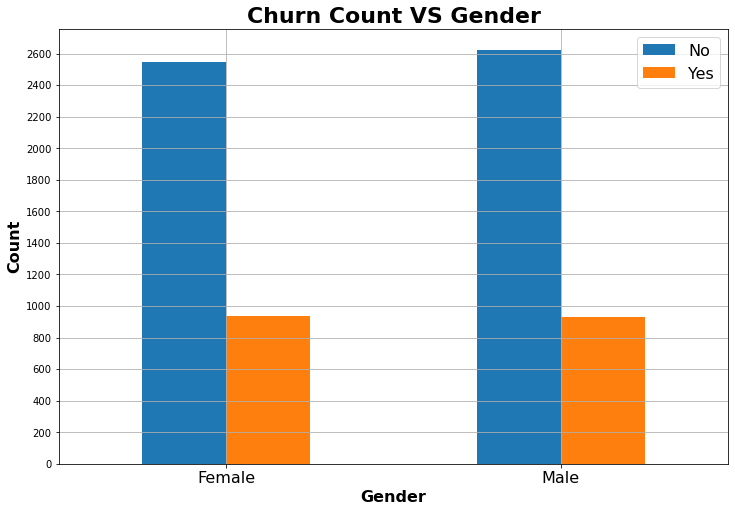

In [46]:
#Craeting Bar Chart of churn and gender
data.plot(kind='bar',figsize=(12,8))
plt.title('Churn Count VS Gender', fontsize=22,fontweight="bold")
plt.xlabel('Gender', fontsize=16,fontweight="bold")
plt.ylabel('Count', fontsize=16,fontweight="bold")
plt.xticks(fontsize=16,rotation=0)
plt.yticks(np.arange(0,2800,200))
plt.legend(loc=1,fontsize=16)
plt.grid()
plt.show()

The churn count proportion of male and female is almost equal

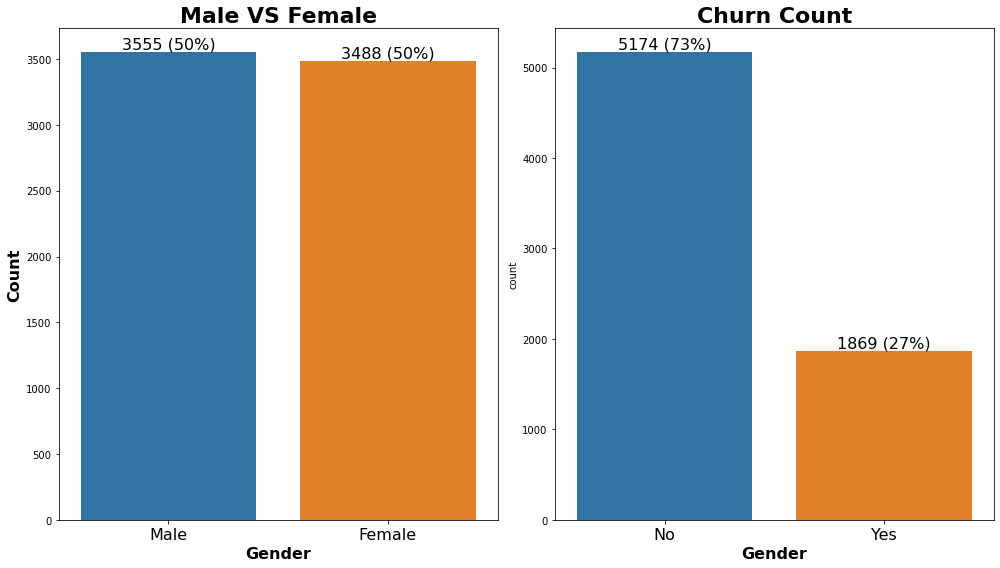

In [47]:
#plotting gender based graph and churn count graph seperately
plt.figure(figsize=(14,8))

plt.subplot(1,2,1)
ax = sns.countplot(x=df['gender'],
                   order=df['gender'].value_counts(ascending=False).index);
        
abs_values = df['gender'].value_counts(ascending=False)
rel_values = df['gender'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls,fontsize=16)
plt.title('Male VS Female', fontsize=22,fontweight="bold")
plt.xlabel('Gender', fontsize=16,fontweight="bold")
plt.ylabel('Count', fontsize=16,fontweight="bold")
plt.xticks(fontsize=16)

plt.subplot(1,2,2)
ax = sns.countplot(x=df['Churn'],
                   order=df['Churn'].value_counts(ascending=False).index);
        
abs_values = df['Churn'].value_counts(ascending=False)
rel_values = df['Churn'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls,fontsize=16)
plt.title('Churn Count', fontsize=22,fontweight="bold")
plt.xlabel('Gender', fontsize=16,fontweight="bold")
plt.xticks(fontsize=16)
plt.tight_layout()
plt.show()

from this  graph it is clear than male and female participation is almost equal and Total percentage of churn is 27%

# 2. Finding female senior citizen inthe dataset

In [48]:
print('Female Senior Citizen in the dataset is ', df[['gender','SeniorCitizen']].value_counts()['Female',1])

Female Senior Citizen in the dataset is  568


# 3.Compare Tenure and Total Charges

From above Info table we can see that the data type of TotalCharges is object. first we want to convert the datatype to number format

In [52]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


now the data type of TotalChrges changed to float

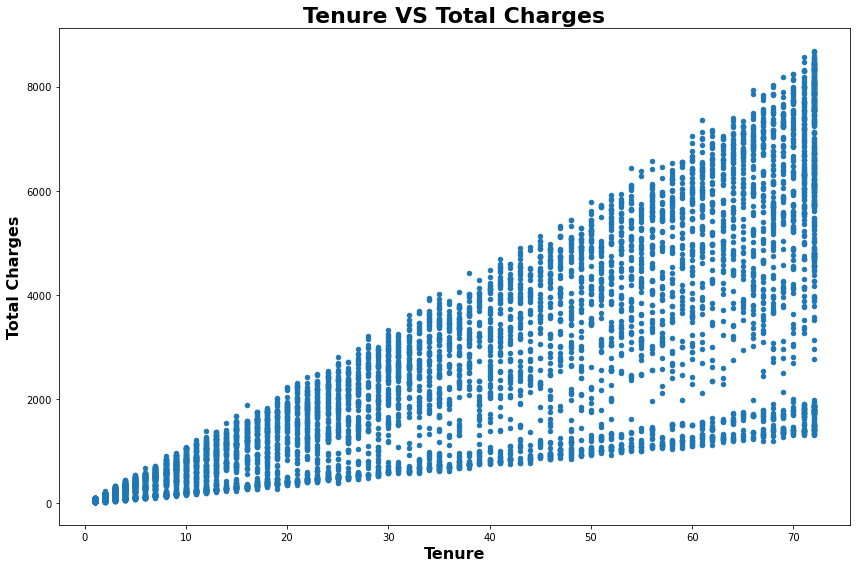

In [54]:

df.plot(x='tenure', y='TotalCharges', kind='scatter',figsize=(12,8))
plt.title('Tenure VS Total Charges', fontsize=22,fontweight="bold")
plt.xlabel('Tenure', fontsize=16,fontweight="bold")
plt.ylabel('Total Charges', fontsize=16,fontweight="bold")
plt.tight_layout()

# 4. Finding which contract preffered by the senior citizen

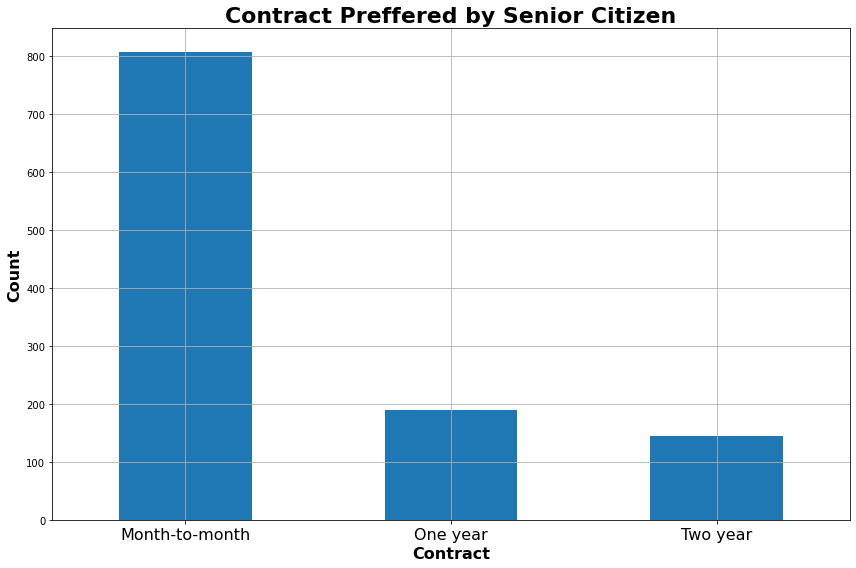

In [60]:
data2=df[df['SeniorCitizen']==1]
data2=data2.groupby(by=['Contract']).size()
data2.plot(kind='bar',figsize=(12,8))

plt.title('Contract Preffered by Senior Citizen', fontsize=22,fontweight="bold")
plt.xlabel('Contract', fontsize=16,fontweight="bold")
plt.ylabel('Count', fontsize=16,fontweight="bold")
plt.xticks(fontsize=16, rotation=0)
plt.grid()
plt.tight_layout()

Most of the senior citizens preferring month to month contract followed by one year contract and Two year contract

# 5. Comment your finds on Payment Method

creating pivot table of payment method based on gender

In [95]:
data3=df.groupby(['PaymentMethod', 'gender'])['PaymentMethod'].aggregate('count').unstack()
data3

gender,Female,Male
PaymentMethod,,
Bank transfer (automatic),788,756
Credit card (automatic),752,770
Electronic check,1170,1195
Mailed check,778,834


Plotting a bar graph based on above data

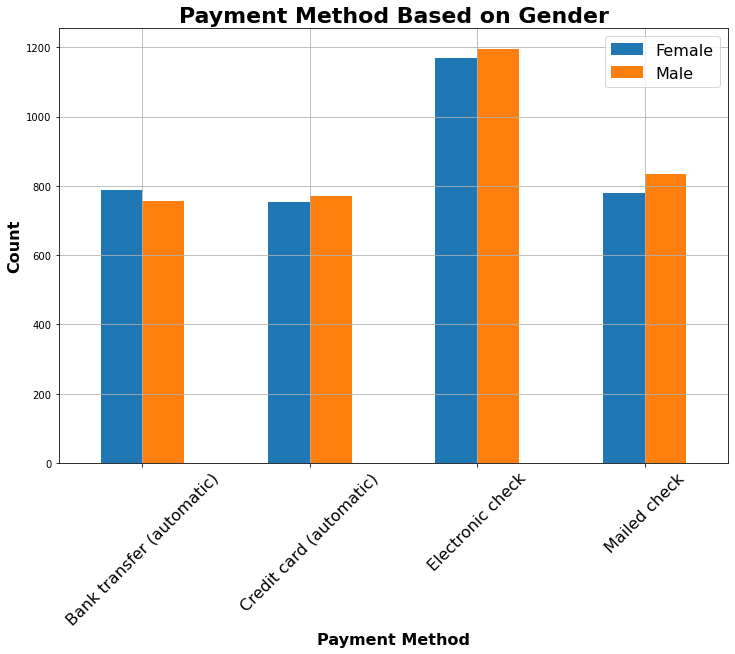

In [102]:
data3.plot(kind='bar',figsize=(12,8))
plt.title('Payment Method Based on Gender', fontsize=22,fontweight="bold")
plt.xlabel('Payment Method', fontsize=16,fontweight="bold")
plt.ylabel('Count', fontsize=16,fontweight="bold")
plt.xticks(fontsize=16,rotation=45)
plt.yticks(np.arange(0,1400,200))
plt.legend(loc=1,fontsize=16)
plt.grid()
plt.show()

From above graph it is clear that most of the people using electronic transfer as payment method whether it is male or female, based on gender when analysing all payment method there is a slight difference in count or we can say it is almost equal. Bank Transfer method is mostly used by females than Males and all other methods are mostly used by males.